
## Finding best model and hyper parameter tunning using GridSearchCV

* For iris flower dataset in sklearn library, we are going to find out best model and best hyper parameters using GridSearchCV

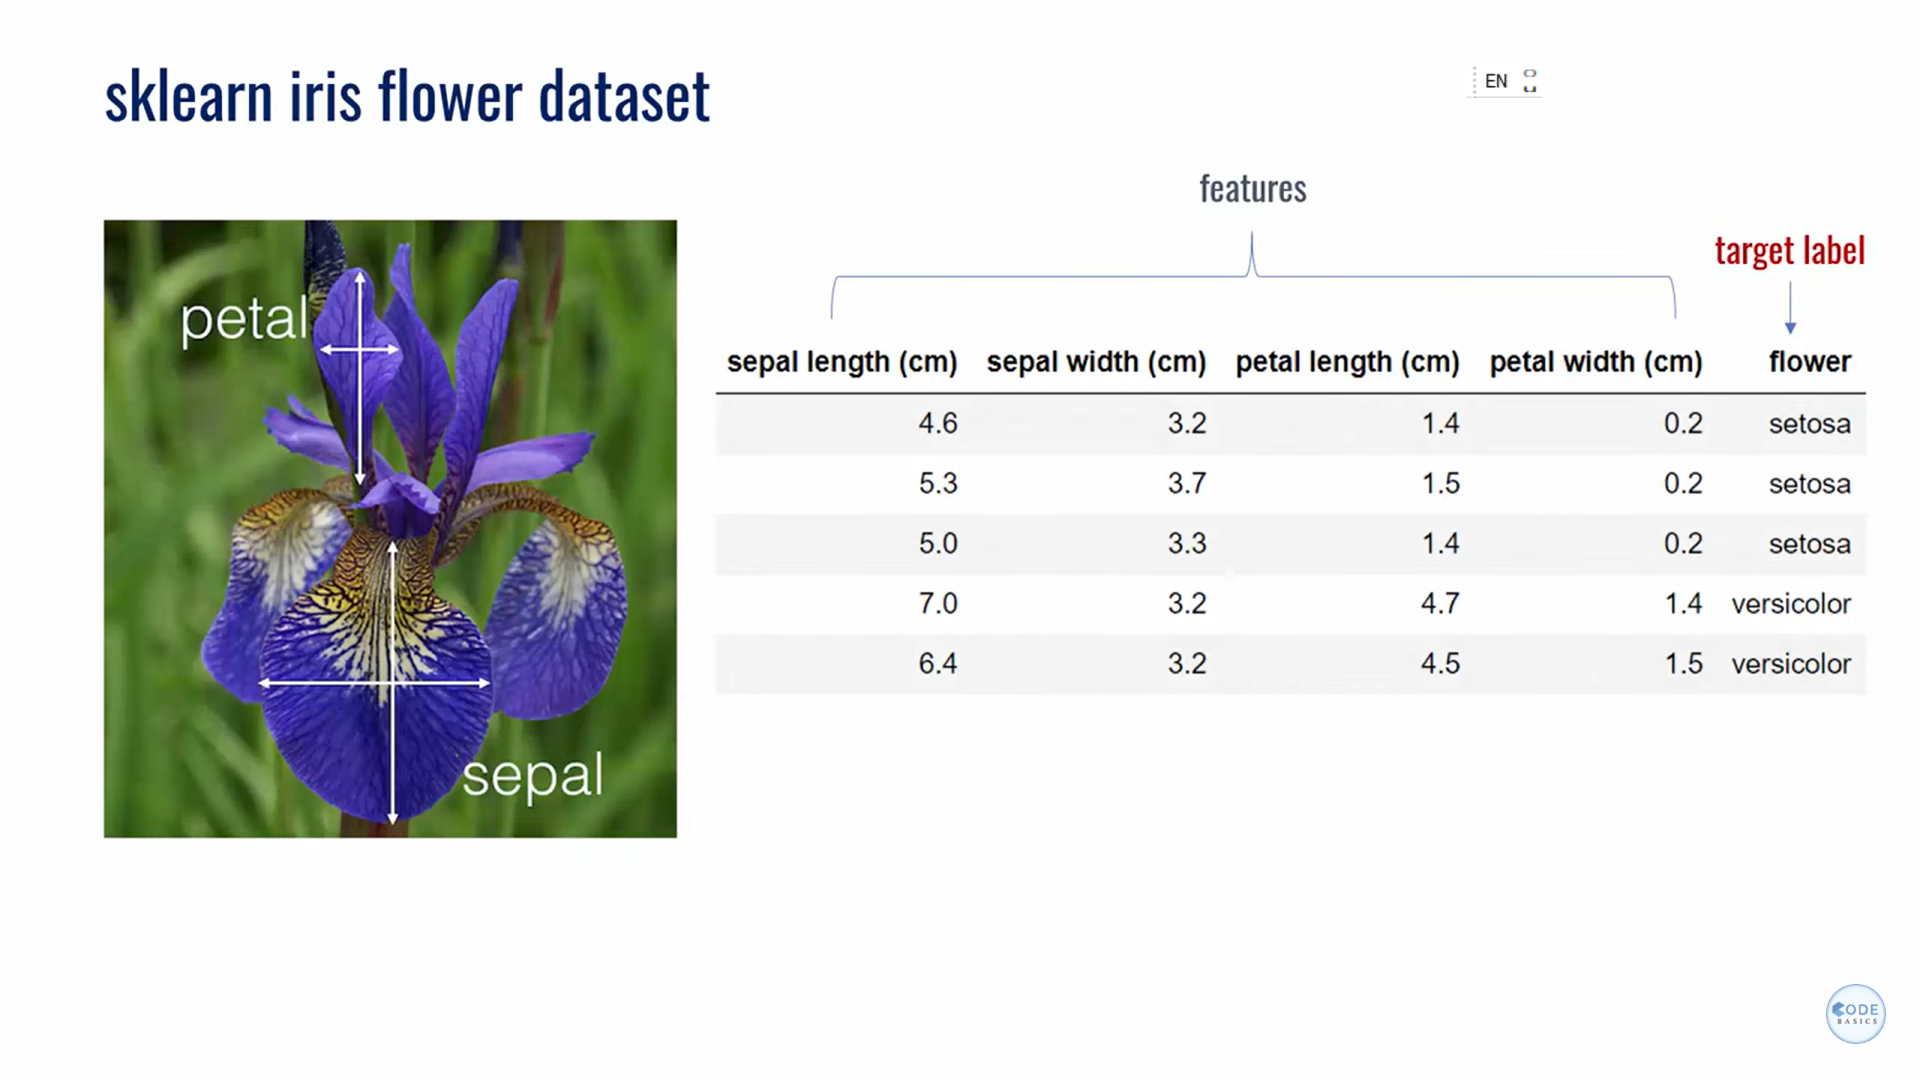
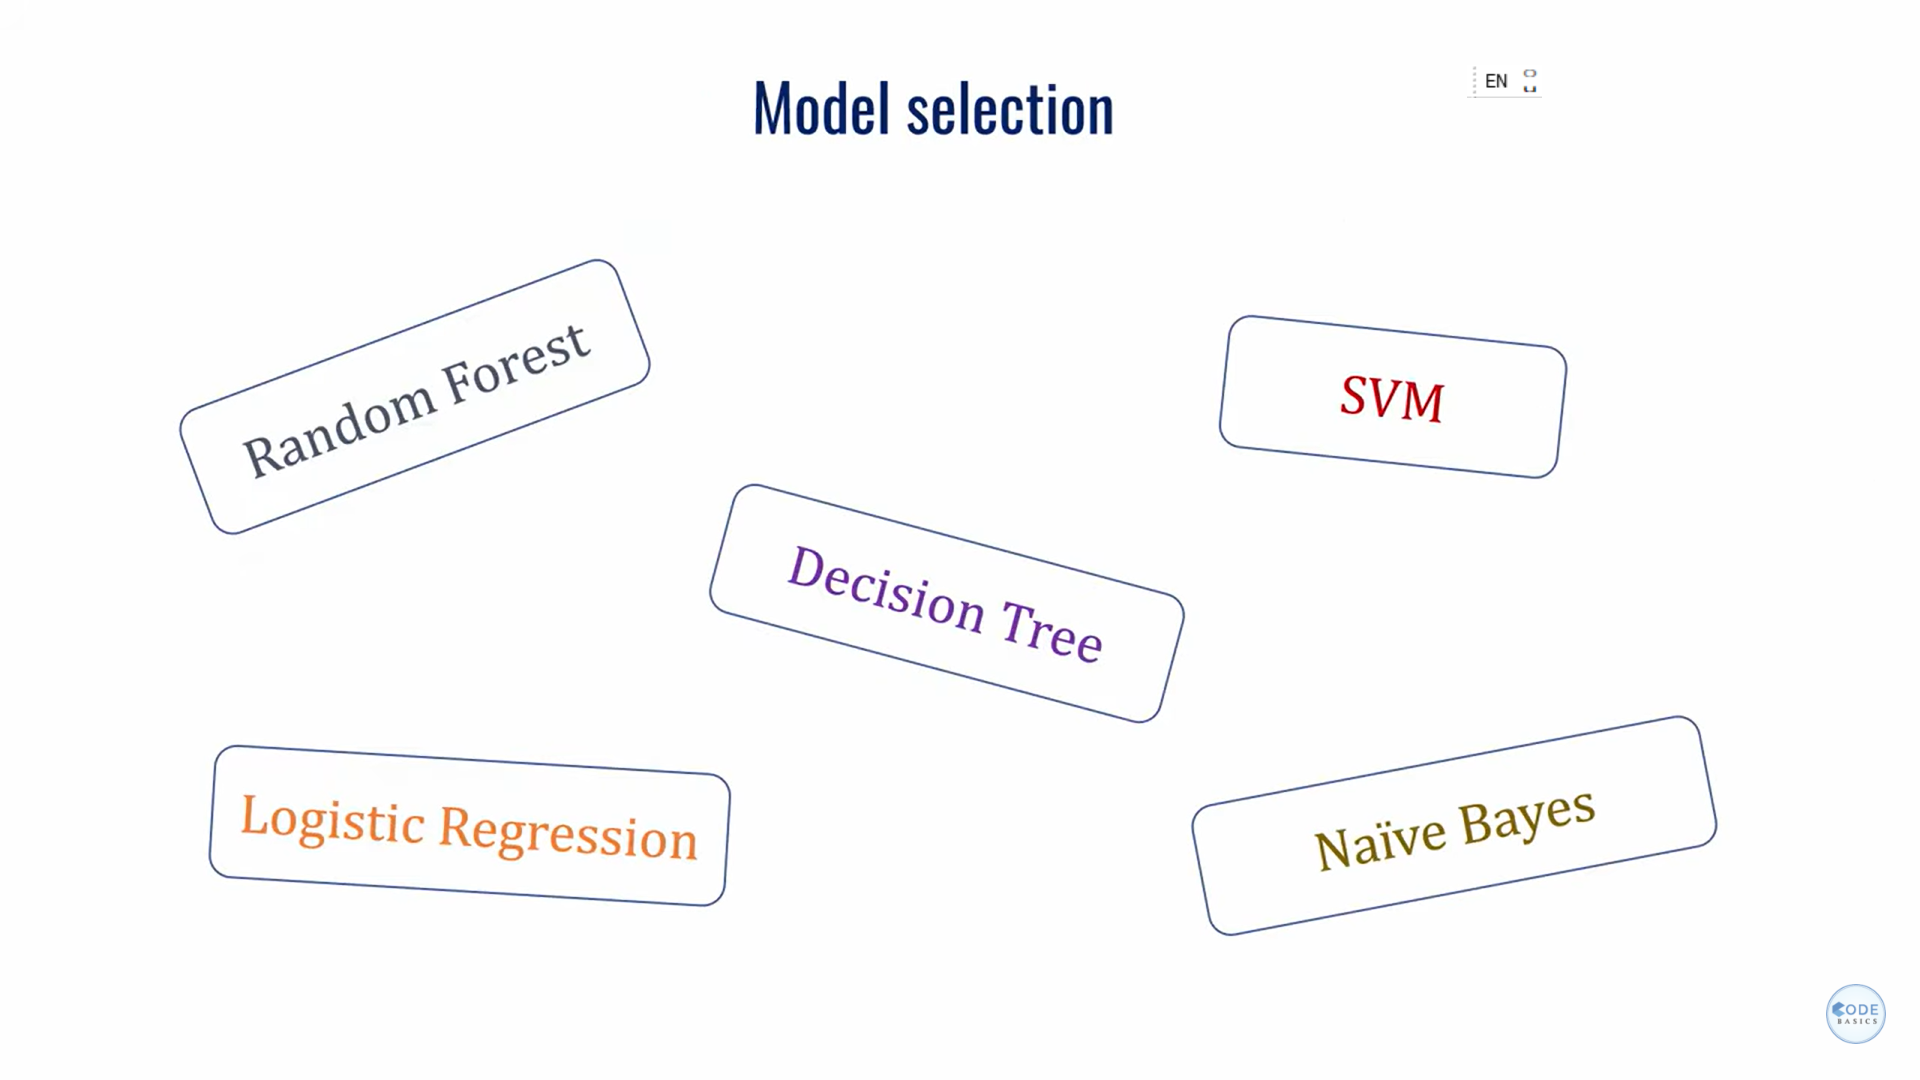
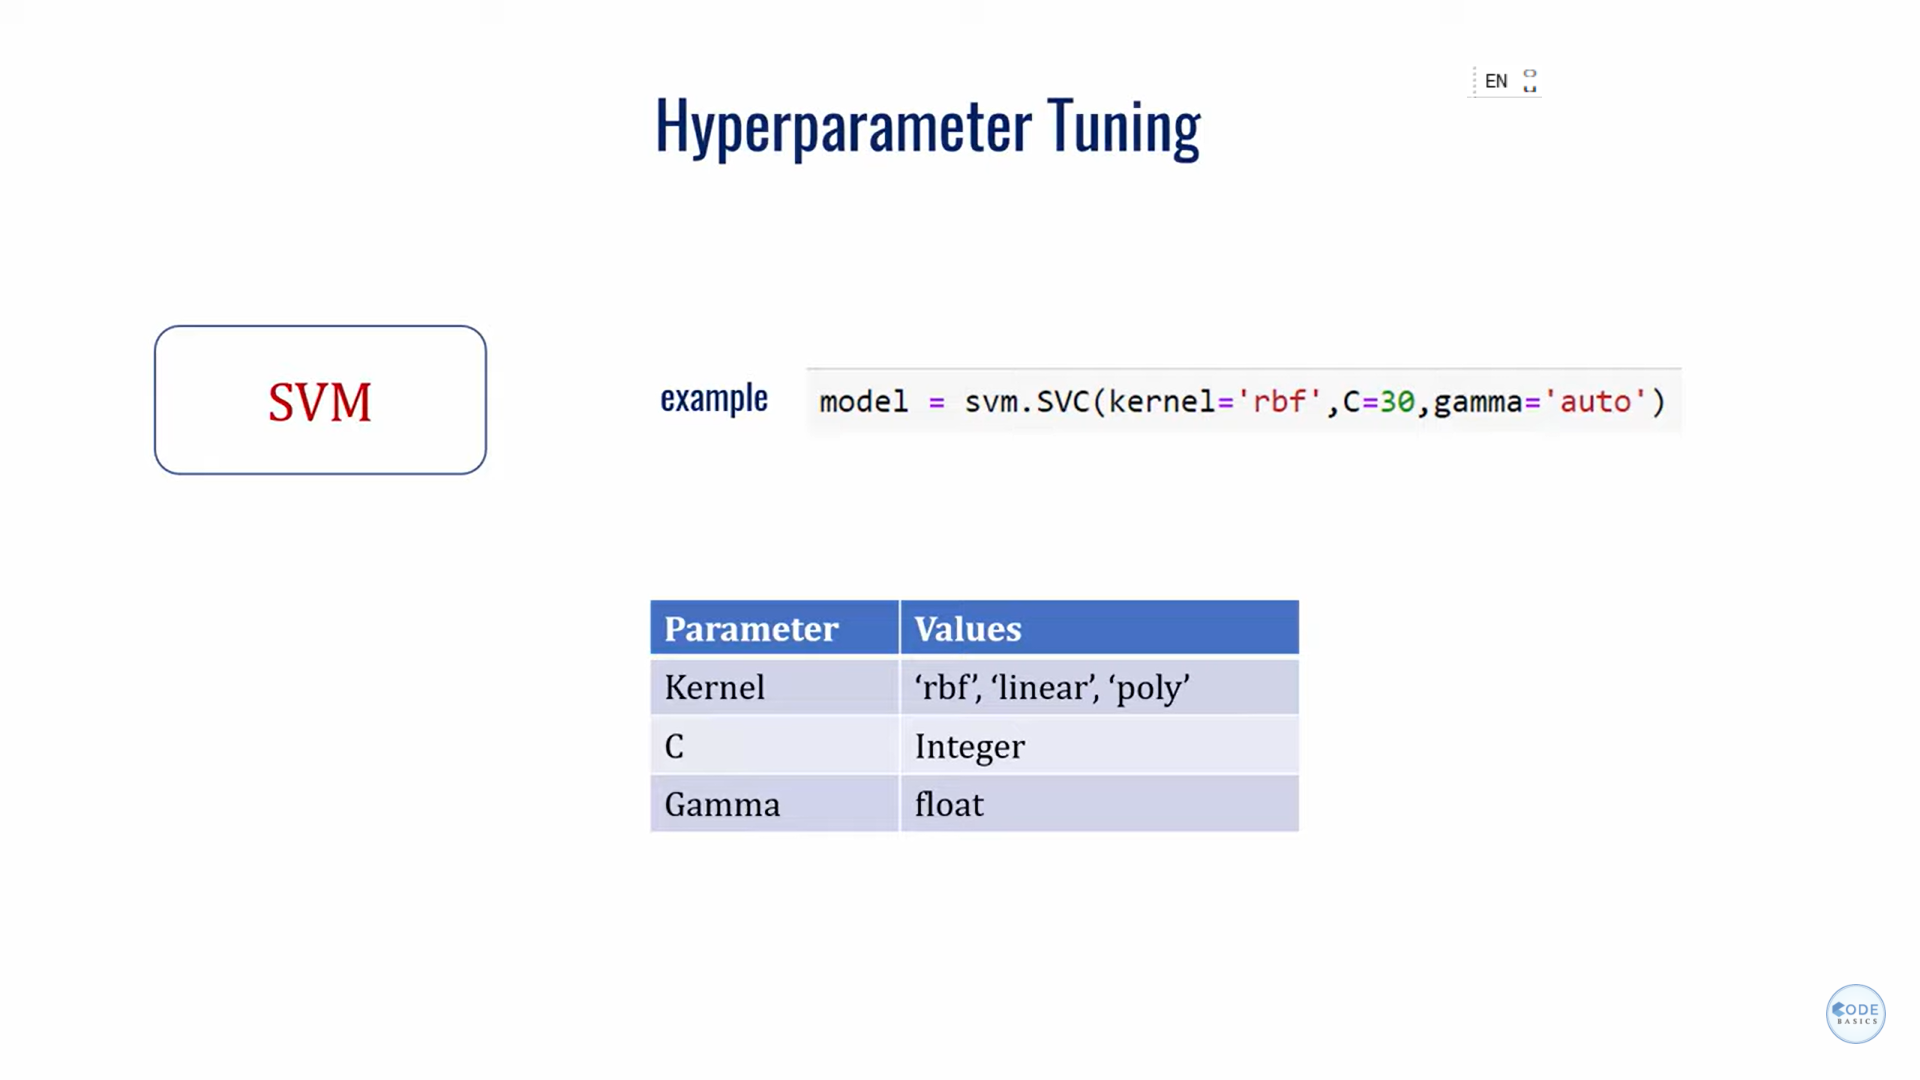
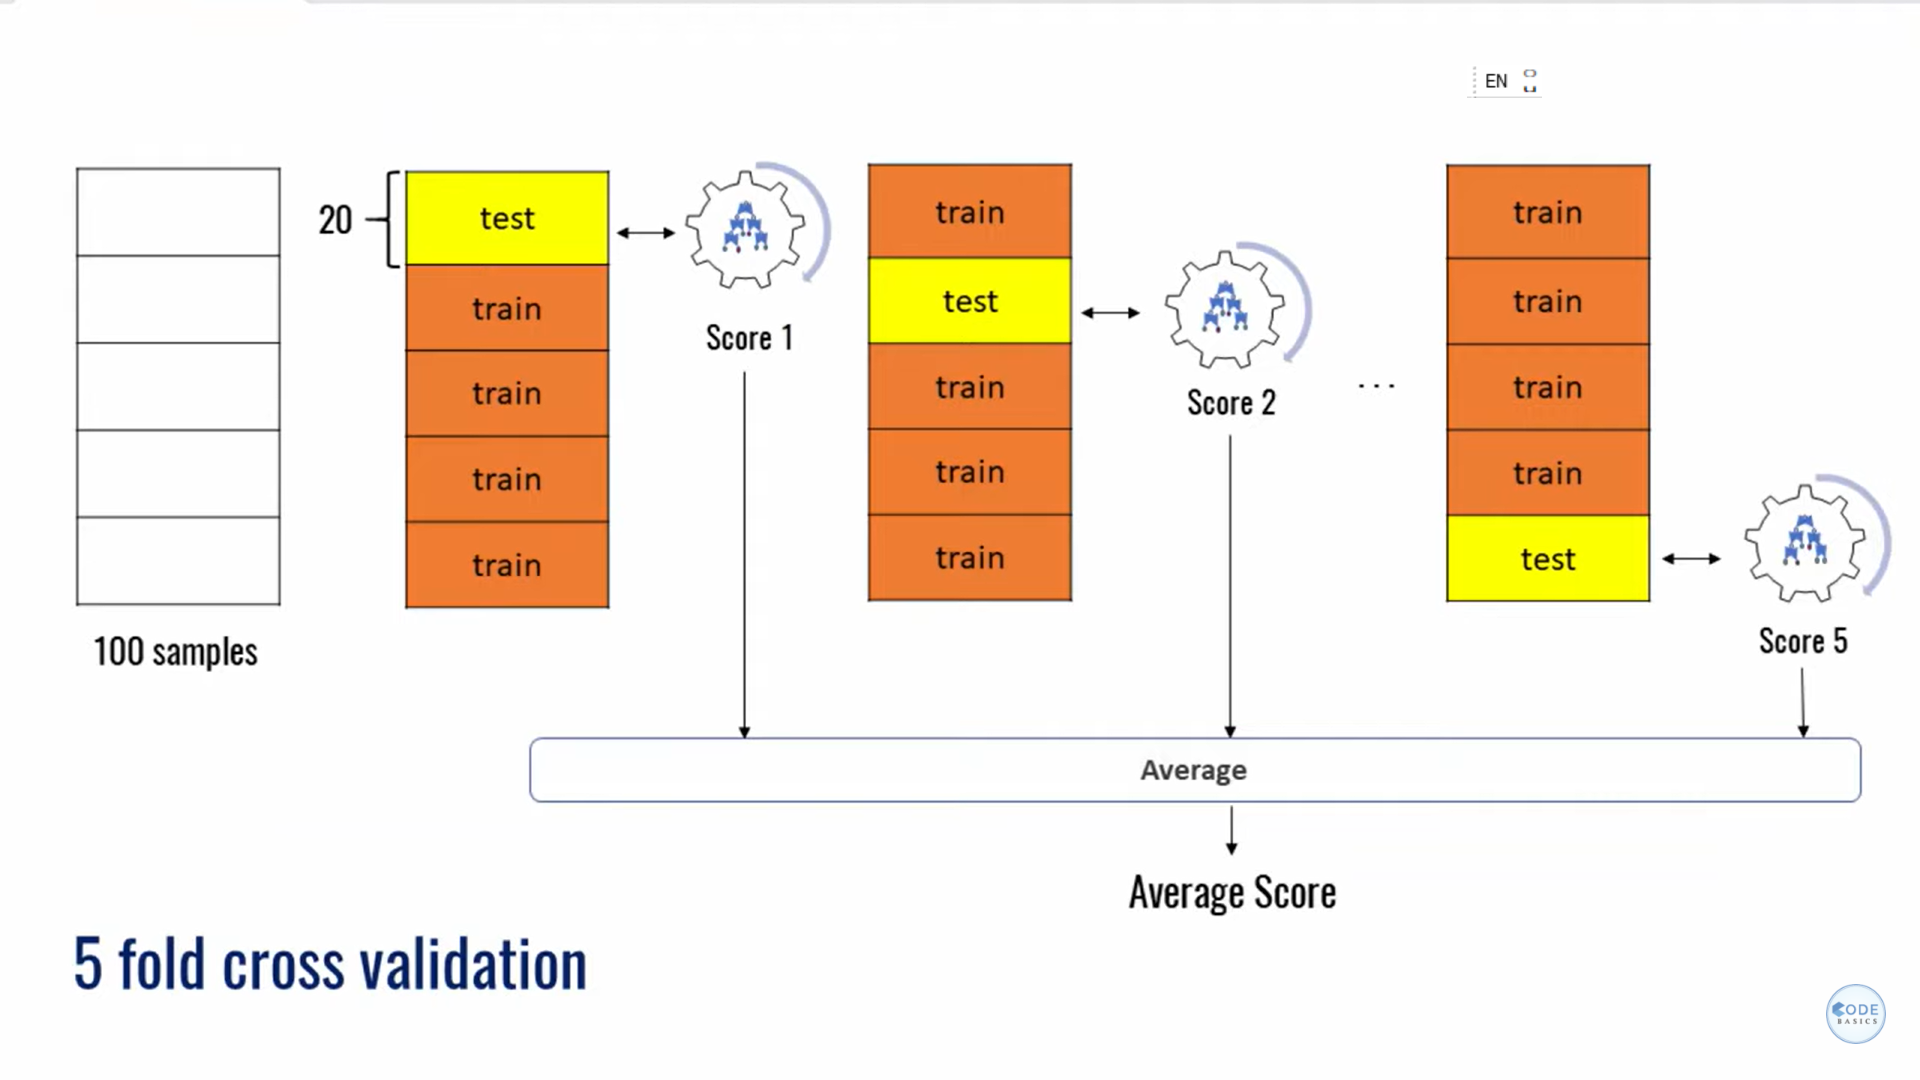


#### Load iris flower dataset

In [22]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn import svm, datasets
iris = datasets.load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [24]:
import pandas as pd
import numpy as np

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower'] =iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df.flower.unique()

array([np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')],
      dtype=object)

#### Approach 1: Use train_test_split and manually tune parameters by trial and error


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [26]:
model = svm.SVC(kernel ='rbf', C=30, gamma='auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9777777777777777

#### Approach 2: Use K Fold Cross validation



* Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation


In [27]:
from sklearn.model_selection import cross_val_score


In [28]:
model = svm.SVC(kernel='linear',C=10,gamma='auto')
cv_score = cross_val_score(model, iris.data, iris.target, cv=5)
cv_score

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [29]:
np.average(cv_score)

np.float64(0.9733333333333334)

In [30]:
model = svm.SVC(kernel='rbf',C=10,gamma='auto')
cross_val_score(model, iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [31]:
model = svm.SVC(kernel='rbf',C=20,gamma='auto')
cross_val_score(model, iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

* Above approach is tiresome and very manual. We can use for loop as an alternative

In [32]:
kernels = ['rbf', 'linear']
C = [1,10,20,50]
avg_scores = {}
for kval in kernels:
    for cval in C:
        model = svm.SVC(kernel=kval,C=cval,gamma='auto')
        cv_scores = cross_val_score(model,iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)
avg_scores

{'rbf_1': np.float64(0.9800000000000001),
 'rbf_10': np.float64(0.9800000000000001),
 'rbf_20': np.float64(0.9666666666666668),
 'rbf_50': np.float64(0.96),
 'linear_1': np.float64(0.9800000000000001),
 'linear_10': np.float64(0.9733333333333334),
 'linear_20': np.float64(0.9666666666666666),
 'linear_50': np.float64(0.9666666666666666)}

* From above results we can say that rbf with C=1 or 10 or linear with C=1 will give best performance


#### Approach 3: Use GridSearchCV


In [33]:
from sklearn.model_selection import GridSearchCV

model = svm.SVC(gamma='auto') # Support Vector Classifier with automatic gamma
param_grid = {
    'C': [1, 10, 20, 30, 50],      # Values of the regularization parameter C
    'kernel': ['rbf', 'linear']  # Types of kernels to consider
}

# Create a GridSearchCV object with cross-validation
clf = GridSearchCV(
    model,    
    param_grid,           # Parameter grid to search over
    cv=5,                 # 5-fold cross-validation
    return_train_score=False  # Do not return training scores
)

clf.fit(iris.data, iris.target)
clf.cv_results_  #hard to read... feed it into a df

{'mean_fit_time': array([0.00315394, 0.00102472, 0.00223703, 0.00240979, 0.0021349 ,
        0.00103183, 0.00170689, 0.00241294, 0.00241261, 0.00188365]),
 'std_fit_time': array([0.00525269, 0.00095015, 0.00209779, 0.00387249, 0.00278463,
        0.00206366, 0.00201797, 0.00270954, 0.00482521, 0.00242341]),
 'mean_score_time': array([0.00057654, 0.00016727, 0.00076637, 0.00019298, 0.00020123,
        0.00132685, 0.        , 0.00040002, 0.00051532, 0.        ]),
 'std_score_time': array([0.00078389, 0.00033455, 0.00153275, 0.00038595, 0.00040245,
        0.00265369, 0.        , 0.00055859, 0.00103064, 0.        ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20, 30, 30, 50, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear',
                    'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, 

In [34]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003154,0.005253,0.000577,0.000784,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001025,0.000950,0.000167,0.000335,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.002237,0.002098,0.000766,0.001533,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.000000,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.002410,0.003872,0.000193,0.000386,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.002135,0.002785,0.000201,0.000402,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.000000,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001032,0.002064,0.001327,0.002654,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,6
6,0.001707,0.002018,0.000000,0.000000,30,rbf,"{'C': 30, 'kernel': 'rbf'}",0.966667,1.000000,0.900000,0.933333,1.0,0.960000,0.038873,8
7,0.002413,0.002710,0.000400,0.000559,30,linear,"{'C': 30, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.900000,1.0,0.960000,0.048990,8
8,0.002413,0.004825,0.000515,0.001031,50,rbf,"{'C': 50, 'kernel': 'rbf'}",1.000000,0.966667,0.900000,0.933333,1.0,0.960000,0.038873,8
9,0.001884,0.002423,0.000000,0.000000,50,linear,"{'C': 50, 'kernel': 'linear'}",1.000000,1.000000,0.900000,0.933333,1.0,0.966667,0.042164,6


In [35]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667
6,30,rbf,0.960000
7,30,linear,0.960000
8,50,rbf,0.960000
9,50,linear,0.966667


In [36]:
print(dir(clf))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_check_refit_for_multimetric', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_format_results', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_routed_params_for_fit', '_get_scorers', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_select_best_index', '_sk_visual_block_', '

In [37]:
clf.best_score_

np.float64(0.9800000000000001)

In [38]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

#### Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation


In [39]:
from sklearn.model_selection import RandomizedSearchCV

model = svm.SVC(gamma='auto') # Support Vector Classifier with automatic gamma
param_grid = {
    'C': np.arange(1, 51),      # Values of the regularization parameter C
    'kernel': ['rbf', 'linear']  # Types of kernels to consider
}

# Create a GridSearchCV object with cross-validation
rs = RandomizedSearchCV(
    model,    
    param_grid,           # Parameter grid to search over
    cv=5,                 # 5-fold cross-validation
    return_train_score=False,  # Do not return training scores
    n_iter=10
)

rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]


,param_C,param_kernel,mean_test_score
0,2,linear,0.980000
1,44,rbf,0.960000
2,31,rbf,0.960000
3,6,rbf,0.980000
4,16,linear,0.966667
5,19,linear,0.966667
6,24,rbf,0.966667
7,37,rbf,0.966667
8,49,rbf,0.960000
9,27,linear,0.960000


In [40]:
rs.best_score_

np.float64(0.9800000000000001)

In [41]:
rs.best_params_

{'kernel': 'linear', 'C': np.int64(2)}

#### How about different models with different hyperparameters?

In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [43]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.953333,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}
